In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

##本次作業為預測角色是否死亡

資料集在以下網址:

https://www.kaggle.com/mylesoneill/game-of-thrones

其中第二份資料的character-deaths.csv

其中三個欄位 Death Year , Book of Death , Death Chapter 取其中一個欄位當預測目標用即可

請將欄位的空值轉成0(代表存活)，有數值的轉成1(代表死亡)

作業流程&要求 ※請使用python處理，可以使用任何套件

1)將資料讀取進來(可用pandas套件)

2)資料前處理

 2-1把空值以0替代

 2-2Death Year , Book of Death , Death Chapter三者取一個，將有數值的轉成1

 2-3將Allegiances轉成dummy特徵(底下有幾種分類就會變成幾個特徵，值是0或1，本來的資料集就會再增加約20種特徵)

 2-4亂數拆成訓練集(75%)與測試集(25%) 

3)使用scikit-learn的DecisionTreeClassifier進行預測(可以先試著將網頁範例(iris)跑出來在使用這次作業的資料集)

4)做出Confusion Matrix，並計算Precision, Recall, Accuracy (提示: 可使用sklearn.metrics)

5)產出決策樹的圖

  p.s 記得限制樹的深度，以免結果無法顯示

 

請將(4)(5)的結果截圖上傳(word 或 PDF)，並上傳python程式碼。

可以嘗試改善資料前處理部分&調整決策樹參數以增加Accuracy
 

要上傳的東西:

1.Word/PDF(截圖跟簡短說明、討論等等)
2.Python程式碼(.py檔)

In [2]:
#1)將資料讀取出來
characterdeaths_df = pd.read_csv('character-deaths.csv')
print(characterdeaths_df.shape)
characterdeaths_df.head()

(917, 13)


,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [3]:
characterdeaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [4]:
characterdeaths_df.describe()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,5.000000,80.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


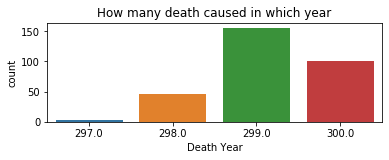

In [5]:
#Checking the maximum death caused in whIch year
plt.subplot(2,1,2)
sns.countplot(characterdeaths_df['Death Year'])
plt.title('How many death caused in which year')
plt.show()

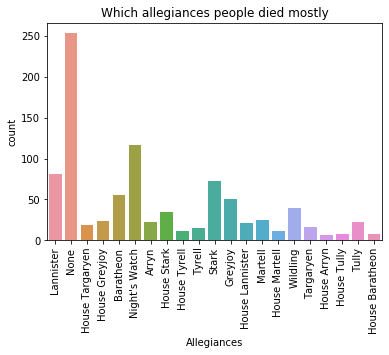

In [6]:
sns.countplot(characterdeaths_df['Allegiances'])
plt.xticks(Rotation = 90)
plt.title('Which allegiances people died mostly')
plt.show()

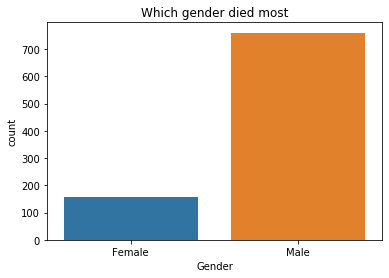

In [7]:
sns.countplot(characterdeaths_df['Gender'])
plt.title('Which gender died most')
plt.xticks(np.arange(2),('Female','Male'))
plt.show()

In [8]:
#2)資料前處理

#2-1把空值以0替代
characterdeaths_df['Death Year'] = characterdeaths_df['Death Year'].fillna(0)
characterdeaths_df['Book of Death'] = characterdeaths_df['Book of Death'].fillna(0)
characterdeaths_df['Death Chapter'] = characterdeaths_df['Death Chapter'].fillna(0)
characterdeaths_df['Book Intro Chapter'] = characterdeaths_df['Book Intro Chapter'].fillna(0)
characterdeaths_df.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0.0,0.0,0.0,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0.0,0.0,0.0,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0


In [9]:
#2-2Death Year , Book of Death , Death Chapter三者取一個，將有數值的轉成1

#characterdeaths_df['Death Year'] = np.where(characterdeaths_df['Death Year']!=0,1,characterdeaths_df['Death Year'])
characterdeaths_df['Book of Death'] = np.where(characterdeaths_df['Book of Death']!=0,1,characterdeaths_df['Book of Death'])
#characterdeaths_df['Death Chapter'] = np.where(characterdeaths_df['Death Chapter']!=0,1,characterdeaths_df['Death Chapter'])

characterdeaths_df.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0.0,0.0,0.0,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,1.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0.0,0.0,0.0,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,1.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0


In [10]:
#2-3 將Allegiances轉成dummy特徵(底下有幾種分類就會變成幾個特徵，值是0或1，本來的資料集就會再增加約20種特徵)
dummies = pd.get_dummies(characterdeaths_df['Allegiances'])
dummies.head()

,Arryn,Baratheon,Greyjoy,House Arryn,House Baratheon,House Greyjoy,House Lannister,House Martell,House Stark,House Targaryen,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
df = pd.concat([characterdeaths_df,dummies],axis = 1)
target_df = df['Book of Death']

del df['Allegiances'], df['Name'],df['Death Year'],df['Book of Death'],df['Death Chapter'],
df.head()

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Arryn,Baratheon,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
0,56.0,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,49.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
#3)使用scikit-learn的DecisionTreeClassifier進行預測(可以先試著將網頁範例(iris)跑出來在使用這次作業的資料集)
# 讀入鳶尾花資料
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

# 建立分類器
clf = tree.DecisionTreeClassifier()
iris_clf = clf.fit(train_X, train_y)

# 預測
test_y_predicted = iris_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)


[2 1 1 2 2 1 1 0 0 1 2 0 0 1 1 1 2 1 0 2 0 2 1 0 0 2 1 2 0 2 2 0 0 0 1 2 0
 1 0 0 1 0 2 0 2]
[2 1 1 1 2 1 1 0 0 1 2 0 0 1 1 1 1 1 0 1 0 2 1 0 0 2 1 2 0 2 2 0 0 0 1 2 0
 1 0 0 1 0 2 0 2]


In [13]:
#2-4亂數拆成訓練集(75%)與測試集(25%) 
# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(df, target_df, test_size = 0.25)


In [14]:
# 建立分類器
clf = tree.DecisionTreeClassifier()
deaths_clf = clf.fit(train_X, train_y)

# 預測
test_y_predicted = deaths_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
548    0.0
578    1.0
457    0.0
550    0.0
366    1.0
      ... 
90     0.0
64     0.0
636    0.0
837    1.0
50     0.0
Name: Book of Death, Length: 230, dtype: float64


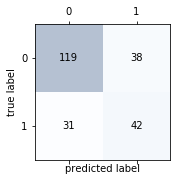

In [15]:
#4)做出Confusion Matrix，並計算Precision, Recall, Accuracy (提示: 可使用sklearn.metrics)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#confusion_matrix(test_y, test_y_predicted)
confmat = confusion_matrix(y_true=test_y, y_pred=test_y_predicted)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

In [16]:
def print_measure(df_actual_prediction):
    n=len(df_actual_prediction)

    print('number of test data: ',n)
    print('\nnumber of Actual positive:',len(df_actual_prediction.query('Actual=="1"')))
    print('number of Actual negative:',len(df_actual_prediction.query('Actual=="0"')))
    print('number of Predicted positive: ',len(df_actual_prediction.query('Predicted=="1"')))
    print('number of Predicted negative: ',len(df_actual_prediction.query('Predicted=="0"')))

    TP=len(df_actual_prediction.query('Actual==Predicted and Predicted=="1"'))
    FP=len(df_actual_prediction.query('Predicted=="1"'))-TP
    print('\nTrue Positive: ',TP)
    print('False Positive:',FP)

    TN=len(df_actual_prediction.query('Actual==Predicted and Predicted=="0"'))
    FN=len(df_actual_prediction.query('Predicted=="0"'))-TN
    print('True Negative: ',TN)
    print('False Negative:', FN)

    print('\nAccuracy:%.4f'% ((TN+TP)/n))
    Precision=TP/(TP+FP)
    print('Precision:%.4f'% Precision)
    Recall=TP/(TP+FN)
    print('Recall:%.4f'% Recall)
    print('F-measure: %.4f' % (2*Precision*Recall/(Precision+Recall)))


In [17]:
predictions = clf.predict(test_X)
df_actual_prediction = pd.DataFrame({
    'Actual': test_y, 
    'Predicted': predictions})
df_actual_prediction
print_measure(df_actual_prediction)

number of test data:  230

number of Actual positive: 73
number of Actual negative: 157
number of Predicted positive:  80
number of Predicted negative:  150

True Positive:  42
False Positive: 38
True Negative:  119
False Negative: 31

Accuracy:0.7000
Precision:0.5250
Recall:0.5753
F-measure: 0.5490


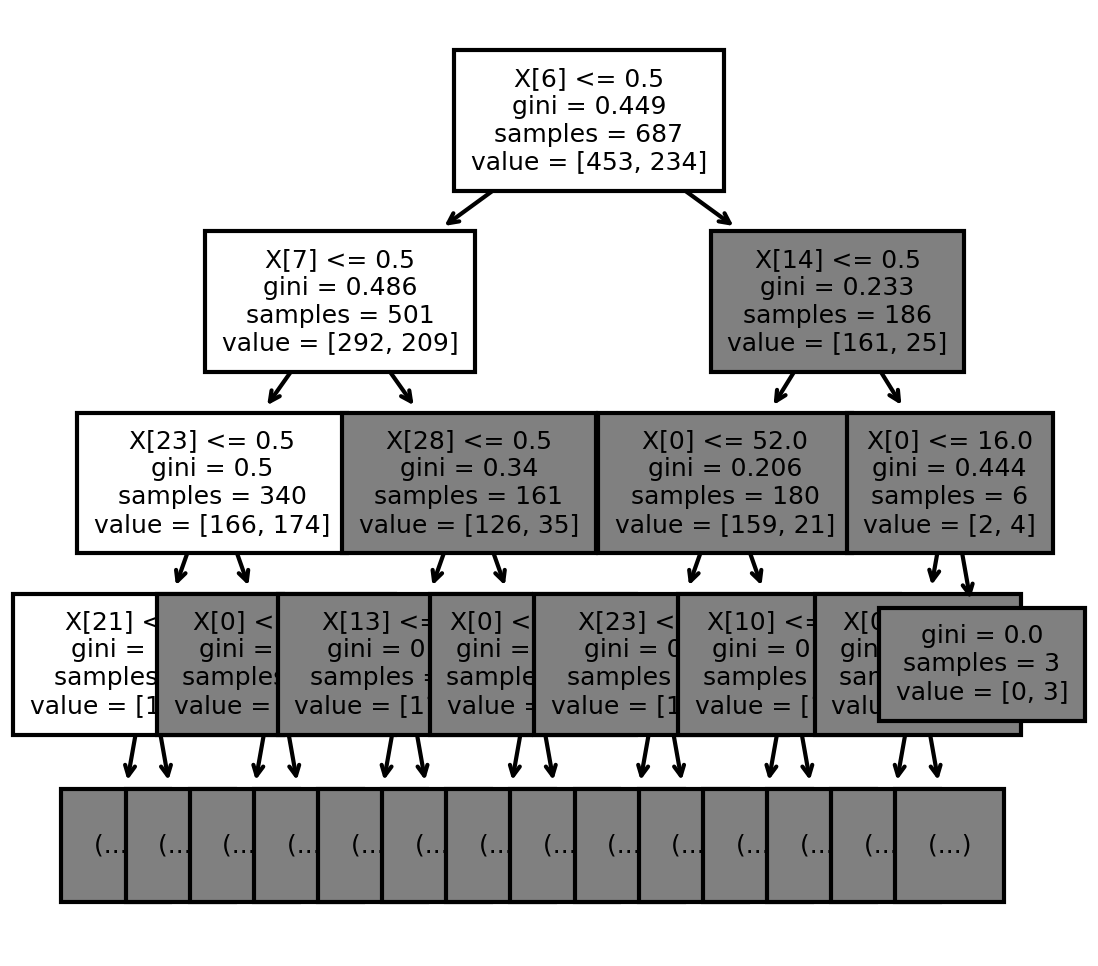

In [18]:
#5)產出決策樹的圖
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,max_depth=3,fontsize=6)
plt.show()
fig.savefig('DecisionTree.png')